In [26]:
using Turing
using MCMCChains
using NPZ

x = npzread("secom_design_matrix.npy");
y = npzread("secom_outcome.npy");

s = 10;

x1 = x[1:s,2:4];
y1 = y[1:s];

size(x1);

In [27]:
test_x = [0;1;2];

sum(((x1*test_x) .* y1) .<= 0);

In [28]:
@model function discon_model(coeff3, obs)
    coeff1 ~ Normal()
    coeff2 ~ Normal()

    c = [coeff1;coeff2;coeff3]

    pred = x1*c
    loss = sum((pred .* y1) .<= 0)

    obs ~ Poisson(loss)
end;

In [29]:

sampler = HMC(0.05,100);

t_model = discon_model(1,0);

chain = sample(t_model, sampler, 2000; progress=false);
size(chain)

(2000, 11, 1)

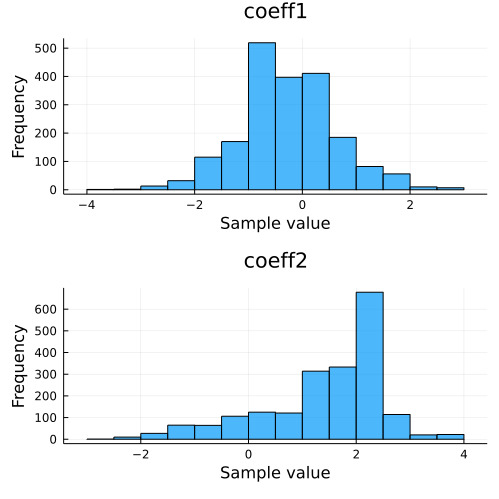

In [30]:
using StatsPlots
histogram(chain)

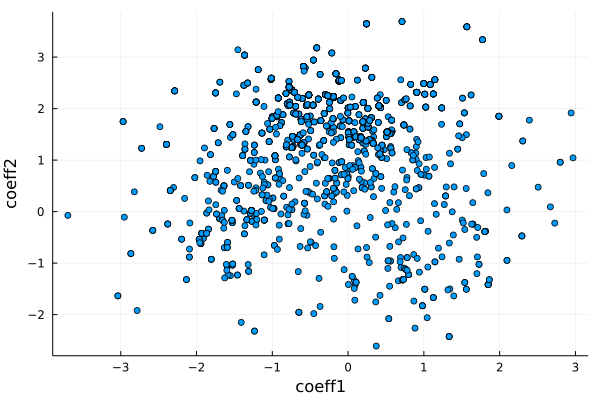

In [31]:
val = get(chain, [:coeff1, :coeff2])
scatter(val.coeff1, val.coeff2, xlabel="coeff1", ylabel="coeff2", legend=false)

In [36]:
prob_model = discon_model(missing, missing)
prob"coeff1 = 1.0, coeff2 = 2.0 | model = t_model, coeff3 = 1.0, obs = 1.0"

0.013064233284684921